In [25]:
import pandas as pd
import numpy as np

%matplotlib inline

### Boston Public Library and Boston City Hall Electricity Consumption

For the independent practice, we will analyze the electrical consuption data from Boston Public Library sampled every 5 min and Boston City Hall sampled every 15 min over a two year period from 2016 to 2017.

The data is again separated by date stamp, but we will focus on analyzing one store for simplicity.



#### Loading the data and setting the DateTimeIndex

In [26]:
dataBPL = pd.read_csv('https://data.boston.gov/dataset/652762e9-2556-47cd-8e80-798546992a57/resource/87c759ee-63b9-4aec-a00b-bba1672a20ef/download/copleylibraryelectricuse.csv', skipinitialspace=True,
                   low_memory=False)
dataCH = pd.read_csv('https://data.boston.gov/dataset/1b894599-21ff-478f-937d-653954977951/resource/f123e65d-dc0e-4c83-9348-ed46fec498c0/download/cityhallelectricuse.csv', skipinitialspace=True,
                   low_memory=False)

In [27]:
dataBPL['Date'] = pd.to_datetime(dataBPL['DateTime_Measured'])
dataBPL.set_index('Date', inplace=True)

dataBPL['Year'] = dataBPL.index.year
dataBPL['Month'] = dataBPL.index.month
dataBPL['Day']= dataBPL.index.day
dataBPL['Weekday']= dataBPL.index.weekday
dataBPL['Hour']= dataBPL.index.hour
dataBPL['Time'] = dataBPL.index.time

In [28]:
dataCH['Date'] = pd.to_datetime(dataCH['DateTime_Measured'])
dataCH.set_index('Date', inplace=True)

dataCH['Year'] = dataCH.index.year
dataCH['Month'] = dataCH.index.month
dataCH['Day']= dataCH.index.day
dataCH['Weekday']= dataCH.index.weekday
dataCH['Hour']= dataCH.index.hour
dataCH['Time'] = dataCH.index.time

#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [29]:
# Filter to store 1 sales and average over weeks
#store1_sales = data[data.Store == 1][['Weekly_Sales']].resample('W', 'sum')
#store1_sales.head()

#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

/Users/ebola/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  """Entry point for launching an IPython kernel.
/Users/ebola/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  


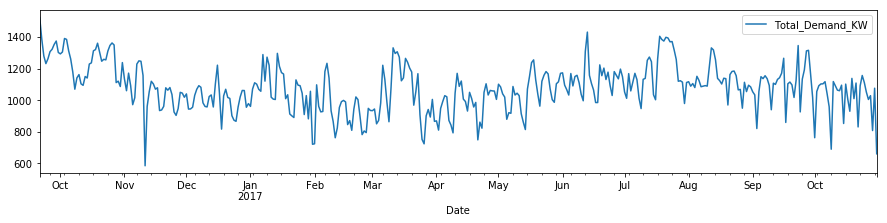

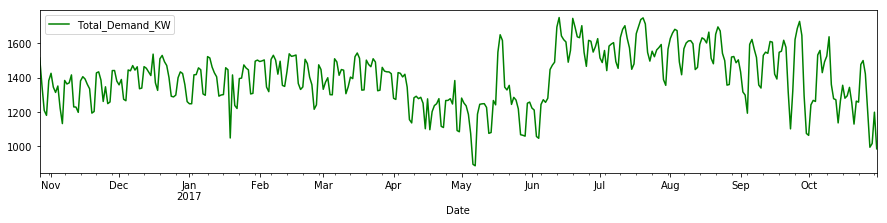

In [30]:
BPL_electric = pd.rolling_mean(dataBPL[['Total_Demand_KW']], 3).resample('D').mean()
CH_electric = pd.rolling_mean(dataCH[['Total_Demand_KW']], 3).resample('D').mean()
BPL_electric.plot(figsize=(15,3))
CH_electric.plot(figsize=(15,3),color='g')
#dataBPL[['Total_Demand_KW']].resample('H').rolling(window=3,center=False).mean().plot()
#dataCH[['Total_Demand_KW']].resample('H').rolling(window=3,center=False).mean().plot()

#### Compute the 1, 24, 168 autocorrelations for Boston Public Library Hourly_KW and autocorrelation plot.

In [19]:
print('Autocorrelation 1: ', BPL_electric['Total_Demand_KW'].autocorr(1))
print('Autocorrelation 7: ', BPL_electric['Total_Demand_KW'].autocorr(24))
print('Autocorrelation 168: ', BPL_electric['Total_Demand_KW'].autocorr(168))

('Autocorrelation 1: ', 0.66536778049152467)
('Autocorrelation 7: ', 0.15837374789019878)
('Autocorrelation 168: ', -0.061715297750297701)


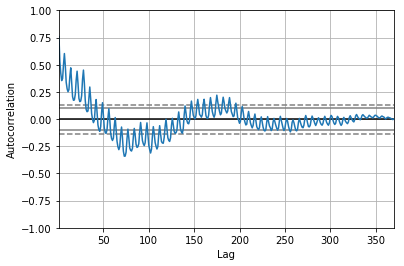

In [20]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(CH_electric['Total_Demand_KW'])

In [21]:
dataBPL.tail(20)

,DateTime_Measured,Total_Demand_KW,Year,Month,Day,Weekday,Hour,Time
Date,,,,,,,,
2016-09-21 11:45:00,2016-09-21 11:45:00,1641.6,2016,9,21,2,11,11:45:00
2016-09-21 11:40:00,2016-09-21 11:40:00,1692.0,2016,9,21,2,11,11:40:00
2016-09-21 11:35:00,2016-09-21 11:35:00,1677.6,2016,9,21,2,11,11:35:00
2016-09-21 11:30:00,2016-09-21 11:30:00,1648.8,2016,9,21,2,11,11:30:00
2016-09-21 11:25:00,2016-09-21 11:25:00,1605.6,2016,9,21,2,11,11:25:00
2016-09-21 11:20:00,2016-09-21 11:20:00,1648.8,2016,9,21,2,11,11:20:00
2016-09-21 11:15:00,2016-09-21 11:15:00,1684.8,2016,9,21,2,11,11:15:00
2016-09-21 11:05:00,2016-09-21 11:05:00,1677.6,2016,9,21,2,11,11:05:00
2016-09-21 11:00:00,2016-09-21 11:00:00,1684.8,2016,9,21,2,11,11:00:00


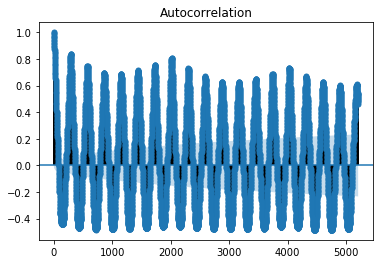

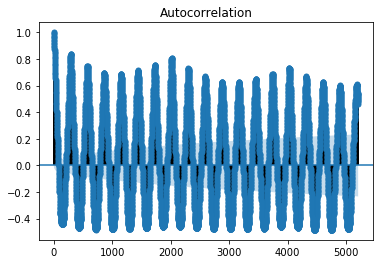

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataBPL['Total_Demand_KW'], lags=5209)

# The dataBPL dataset is sampled every 5 minutes and show correlation peaks every 
# 7 day (2016 data points) cycles and subpeaks every 24 hours. The correlation 
# factor is 0.8 at 168 hours (weekly) 

# Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
# In the plot above notice, spike at around 52 - implying a yearly pattern as well
# No random spikes, probably not much use for a moving average model

In [23]:
BPL_electric.tail()

,Total_Demand_KW
Date,
2017-10-27,1004.280093
2017-10-28,1028.278935
2017-10-29,807.719907
2017-10-30,1075.491898
2017-10-31,660.607261


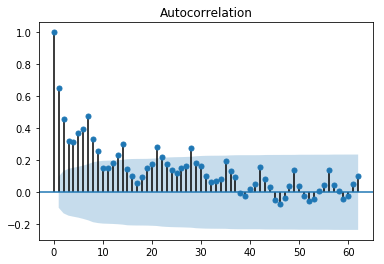

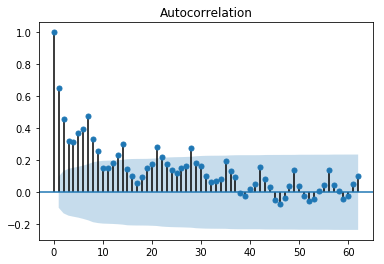

In [24]:

plot_acf(BPL_electric['Total_Demand_KW'], lags=62)

##### Split the energy consumption (5 min) data in a training and test set - using 75% of the data for training

In [31]:
n = len(dataBPL.Total_Demand_KW)

train = dataBPL.Total_Demand_KW[:int(.75*n)]
test = dataBPL.Total_Demand_KW[int(.75*n):]

In [32]:
train.head()

Date
2017-10-31 08:30:00    1209.0
2017-10-31 08:25:00    1216.0
2017-10-31 08:20:00    1216.0
2017-10-31 08:15:00    1216.0
2017-10-31 08:10:00    1188.0
Name: Total_Demand_KW, dtype: float64

In [33]:
train.tail()

Date
2016-12-31 17:10:00     684.0
2016-12-31 17:05:00     864.0
2016-12-31 17:00:00    1504.8
2016-12-31 16:55:00    1468.8
2016-12-31 16:50:00    1476.0
Name: Total_Demand_KW, dtype: float64

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [39]:
model = sm.tsa.ARIMA(train, (1, 1, 0)).fit()
print(model.params)

const                      0.003046
ar.L1.D.Total_Demand_KW    0.106003
dtype: float64


In [45]:
model = sm.tsa.ARIMA(train, (1, 1, 0)).fit()

predictions = model.predict(dynamic=True)
#predictions = model.predict(
#    '2016-12-31 17:10:00',
#    '2017-10-31 08:10:00',
#    dynamic=True, 
#)
print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Total_Demand_KW   No. Observations:                87473
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -457269.078
Method:                       css-mle   S.D. of innovations             45.088
Date:                Tue, 31 Oct 2017   AIC                         914544.156
Time:                        11:31:19   BIC                         914572.293
Sample:                    10-31-2017   HQIC                        914552.746
                         - 12-31-2016                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0030      0.171      0.018      0.986      -0.331       0.337
ar.L1.D.Total_Demand_KW     0.1060      0.003     31.529      0.000       0.099       0.113
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.4337           +0.0000j            9.4337            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

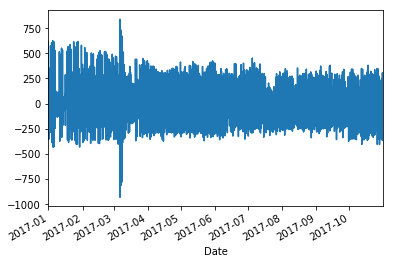

In [46]:
model.resid.plot()

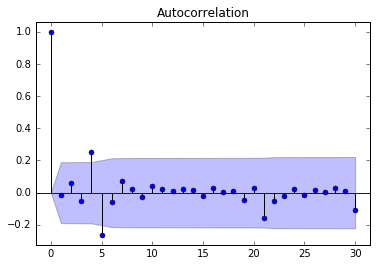

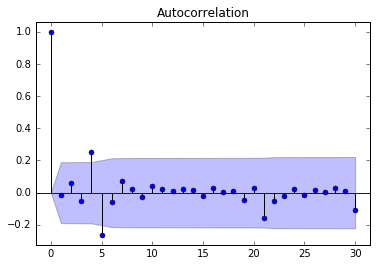

In [15]:
plot_acf(model.resid, lags=30)

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [16]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 81203.240909485947)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Tue, 08 Mar 2016   AIC                           2876.963
Time:                        12:48:22   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003         0.108     0.487
ar.L2.Weekly_Sales     0.0589      0.098      0.603      0.548        -0.132     0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3081           +0.0000j            2.3081            0.0000
AR.2           -7.3588           +0.0000j            7.3588            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 80502.745386798299)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144113.350
Date:                Tue, 08 Mar 2016   AIC                           2863.563
Time:                        12:48:23   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.327      0.000      1.51e+06  1.58e+06
ar.L1.Weekly_Sales    -1.0400      0.090    -11.583      0.000        -1.216    -0.864
ar.L2.Weekly_Sales    -0.4701      0.087     -5.381      0.000        -0.641    -0.299
ma.L1.Weekly_Sales     1.4692      0.058     25.424      0.000         1.356     1.582
ma.L2.Weekly_Sales     0.9998      0.074     13.576      0.000         0.855     1.144
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1060           -0.9507j            1.4584           -0.3870
AR.2           -1.1060           +0.9507j            1.4584            0.3870
MA.1           -0.7347           -0.6785j            1.0001           -0.3813
MA.2           -0.7347           +0.6785j            1.0001            0.3813
-----------------------------------------------------------------------------
"""

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [18]:
model = sm.tsa.ARIMA(train, (2, 1, 3)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=False, 
    typ='levels'
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 77789.494825392394)


/Users/arahuja/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Weekly_Sales   No. Observations:                  106
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1413.622
Method:                       css-mle   S.D. of innovations         142943.992
Date:                Tue, 08 Mar 2016   AIC                           2841.243
Time:                        12:48:27   BIC                           2859.887
Sample:                    02-14-2010   HQIC                          2848.800
                         - 02-19-2012                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  577.5354    622.025      0.928      0.355      -641.611  1796.682
ar.L1.D.Weekly_Sales    -1.0481      0.090    -11.609      0.000        -1.225    -0.871
ar.L2.D.Weekly_Sales    -0.4778      0.088     -5.442      0.000        -0.650    -0.306
ma.L1.D.Weekly_Sales     0.4694      0.116      4.057      0.000         0.243     0.696
ma.L2.D.Weekly_Sales    -0.4693      0.152     -3.095      0.003        -0.766    -0.172
ma.L3.D.Weekly_Sales    -0.9997      0.123     -8.098      0.000        -1.242    -0.758
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0967           -0.9434j            1.4466           -0.3869
AR.2           -1.0967           +0.9434j            1.4466            0.3869
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2           -0.7348           -0.6784j            1.0001           -0.3813
MA.3           -0.7348           +0.6784j            1.0001            0.3813
-----------------------------------------------------------------------------
"""